In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as BS
import re

In [2]:
# 데이터 불러오기 및 필요 없는 열 제거 + na 제거
data = pd.read_excel(r'C:\Users\user0216\OneDrive - Sejong University\바탕 화면\ESG_classificaion_KG\ESG_KG_personal_project\ESG_only.xlsx')
data = data.drop(data.columns[0], axis=1)
data = data.dropna()
data = data.reset_index()
data

,index,label,text
0,0,E,한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...
1,1,E,기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...
2,2,E,그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...
3,3,E,BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...
4,4,E,너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.
...,...,...,...
60392,63429,S,-7년 상반기에는 사랑의 집 -7호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑...
60393,63430,S,중국 지역 사랑의 물 나누기 운동 -7년 -7월부터 중국부녀발전기금회 주관의 전 국...
60394,63431,S,아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...
60395,63432,S,또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다.


In [3]:
e_label = data.loc[data['label'] == 'E']
s_label = data.loc[data['label'] == 'S']
g_label = data.loc[data['label'] == 'G']

([<matplotlib.axis.XTick at 0x1f320465b08>,
 [Text(0, 0, '15344'), Text(1, 0, '37980'), Text(2, 0, '7073')])

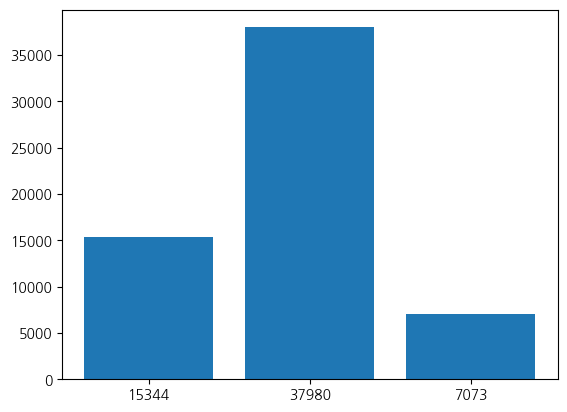

In [4]:
# 각 label별 분포
a = len(e_label)
b = len(s_label)
c = len(g_label)
length = a,b,c

import matplotlib.pyplot as plt
plt.bar(range(len(length)), length)
plt.xticks(range(len(length)), length)

In [5]:
df = e_label.append([s_label, g_label])
df = df.reset_index()
df = df.drop(['index'], axis=1)
df = df.drop(df.columns[0], axis=1)
df

,label,text
0,E,한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...
1,E,기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...
2,E,그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...
3,E,BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...
4,E,너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.
...,...,...
60392,G,또한 효과적인 내부 통제 운영을 위하여 내부 통제 세부 운영지침을 제정하고 이를 바...
60393,G,-7년 상반기 -7건 하반기 -7건의 핵심 통제에 대한 내부 회계관리 제도 운영실태...
60394,G,재무 내부 감사 아시아나항공은 지점 업무 수행 중 발생하는 다양한 리스크 관리를 통...
60395,G,그룹 윤리강령 실천 가능한 부분부터 성실히 실천하자라는 마음가짐으로 임직원의 행동과...


In [10]:
example = df

In [6]:
example = df[:30]
example = example.append([df[30000:30030], df[60000:60030]])
example = example.reset_index()
example = example.drop(['index'], axis=1)
example

,label,text
0,E,한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...
1,E,기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...
2,E,그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...
3,E,BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...
4,E,너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.
...,...,...
85,G,우리는 부당 취득 및 뇌물 등 모든 형태의 부패에 반대한다
86,G,대한항공 이사회는 대표이사진을 비롯한 -7인의 사내이사와 학계 법 조계 관계 등 ...
87,G,사외이사는 주주총회의 결의를 통해 선임하며 주주총회 결의에 앞서 위원 과반수가 사...
88,G,사외이사 를 비롯한 이사 후보의 인적 사항은 주주총회 개최 전 전자공시시스 템을 ...


In [11]:
""" 필요 없는 문자 제거 """
def clean_text(row):
    text = row['text']
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
    text = re.sub(pattern=pattern, repl='', string=text)
    # print("E-mail제거 : " , text , "\n")
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'
    text = re.sub(pattern=pattern, repl='', string=text)
    # print("한글 자음 모음 제거 : ", text , "\n")
    pattern = '<[^>]*>'
    text = re.sub(pattern=pattern, repl='', string=text)
    # print("태그 제거 : " , text , "\n")
    pattern = r'\([^)]*\)'
    text = re.sub(pattern=pattern, repl='', string=text)
    # print("괄호와 괄호안 글자 제거 :  " , text , "\n")
    pattern = '[^\w\s]'
    text = re.sub(pattern=pattern, repl='', string=text)
    # print("특수기호 제거 : ", text , "\n" )
    pattern = '[^\w\s]'
    text = re.sub(pattern=pattern, repl='', string=text)
    # print("필요없는 정보 제거 : ", text , "\n" )
    pattern = '["BNK금융그룹"]'
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '["7"]'
    text = re.sub(pattern=pattern, repl='', string=text)   
    # print("단독 속보 제거 : ", text , "\n" )
    text = text.strip()
    # print("양 끝 공백 제거 : ", text , "\n" )
    text = " ".join(text.split())
    # print("중간에 공백은 1개만 : ", text )
    return text

example['text_c'] = example.apply(clean_text, axis=1)
example

,label,text,text_c
0,E,한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...,한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...
1,E,기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...,기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...
2,E,그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...,리고 이 를 통해 을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 구축해...
3,E,BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...,은 산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하고 있습 니다
4,E,너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.,너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다
...,...,...,...
60392,G,또한 효과적인 내부 통제 운영을 위하여 내부 통제 세부 운영지침을 제정하고 이를 바...,또한 효과적인 내부 통제 운영을 위하여 내부 통제 세부 운영지침을 제정하고 이를 바...
60393,G,-7년 상반기 -7건 하반기 -7건의 핵심 통제에 대한 내부 회계관리 제도 운영실태...,년 상반기 건 하반기 건의 핵심 통제에 대한 내부 회계관리 제도 운영실태 검증을 실...
60394,G,재무 내부 감사 아시아나항공은 지점 업무 수행 중 발생하는 다양한 리스크 관리를 통...,재무 내부 감사 아시아나항공은 지점 업무 수행 중 발생하는 다양한 리스크 관리를 통...
60395,G,그룹 윤리강령 실천 가능한 부분부터 성실히 실천하자라는 마음가짐으로 임직원의 행동과...,윤리강령 실천 가능한 부분부터 성실히 실천하자라는 마음가짐으로 임직원의 행동과 가치...


In [12]:
""" 키워드 추출 from title """
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from tqdm import tqdm

kkma = Kkma()
komoran = Komoran()

example['keyword'] = ''
for i in tqdm(range(len(example))):
    nouns_list = komoran.nouns(example['text_c'][i])
    nouns_list_c = [nouns for nouns in nouns_list if len(nouns) > 1]  # 한글자는 이상한게 많아서 2글자 이상
    a = set(nouns_list_c)
    example['keyword'][i] = a
example

100%|██████████| 60397/60397 [03:21<00:00, 299.83it/s]


,label,text,text_c,keyword
0,E,한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...,한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...,"{대응, 사회, 체계, 국제, 예상, 기후, 변화, 강화, 장기, 한편, 위협}"
1,E,기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...,기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...,"{수요, 시행, 익스, 변화, 증가, 친환경, 분야, 적용, 관리, 소비자, 가운데..."
2,E,그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...,리고 이 를 통해 을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 구축해...,"{환경, 대응, 실현, 변화, 기후, 토대, 보호, 구축}"
3,E,BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...,은 산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하고 있습 니다,"{선도, 환경, 니다, 친환경, 전략, 추진, 지향, 산업, 미래, 경영}"
4,E,너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.,너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다,"{활동, 실천, 환경, 추진, 절감, 효율, 경영}"
...,...,...,...,...
60392,G,또한 효과적인 내부 통제 운영을 위하여 내부 통제 세부 운영지침을 제정하고 이를 바...,또한 효과적인 내부 통제 운영을 위하여 내부 통제 세부 운영지침을 제정하고 이를 바...,"{구성, 조직, 제정, 내부, 규정, 운영, 회사, 효과, 바탕, 역할, 보고, 절..."
60393,G,-7년 상반기 -7건 하반기 -7건의 핵심 통제에 대한 내부 회계관리 제도 운영실태...,년 상반기 건 하반기 건의 핵심 통제에 대한 내부 회계관리 제도 운영실태 검증을 실...,"{관리, 평가, 건의, 내부, 핵심, 시스템, 회계, 운영, 효과, 제도, 실태, ..."
60394,G,재무 내부 감사 아시아나항공은 지점 업무 수행 중 발생하는 다양한 리스크 관리를 통...,재무 내부 감사 아시아나항공은 지점 업무 수행 중 발생하는 다양한 리스크 관리를 통...,"{자체, 아시아나항공, 관리, 수행, 지점, 리스크, 예방, 재무, 규정, 감사, ..."
60395,G,그룹 윤리강령 실천 가능한 부분부터 성실히 실천하자라는 마음가짐으로 임직원의 행동과...,윤리강령 실천 가능한 부분부터 성실히 실천하자라는 마음가짐으로 임직원의 행동과 가치...,"{마음가짐, 가치판단, 실천, 임직원, 윤리, 행동, 기준, 제정, 강령, 부분, ..."


In [14]:
from neo4j import GraphDatabase

""" make node & relationship"""
def add_sentence(tx, label, text, keyword):
    tx.run("MERGE (a:text {text: $text, label: $label, keyword: $keyword})",
           text=text, label = label, keyword=keyword)

def add_label(tx):
    tx.run("MATCH (a:text) "
           "MERGE (b:label {name:a.label}) "
           "MERGE (a)<-[r:Publish]-(b)"
           )


def add_keyword(tx):
    tx.run("MATCH (a:text) "
           "UNWIND a.keyword as k "
           "MERGE (b:Keyword {keyword:k}) "
           "MERGE (a)-[r:Include]->(b)")


""" 한자와 공백 제거 """
# Neo4j -> Gephi 에서 parsing error의 원인이 될 수 있음
def clean_text_for_neo4j(row):
    sent = row['text_c']
    sent = re.sub(pattern='[^a-zA-Z0-9ㄱ-ㅣ가-힣]', repl='', string=sent)
    # print("영어, 숫자, 한글만 포함 : ", text )
    return sent

#df['text_c_neo4j'] = df.apply(clean_text_for_neo4j, axis=1)


""" 연결 """
# Neo4j 브라우저에서 설정한 계정의 ID, PASSWORD를 통해 접속
greeter = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "4402"))  


""" 입력 """
# Cyper code를 이용,  크롤링한 Data를 DB에 입력

with greeter.session() as session:
    """ make node """
    for idx in tqdm(range(len(example))):
        session.write_transaction(add_sentence, text=example.iloc[idx]['text'], label = example.iloc[idx]['label'] ,keyword=list(example.iloc[idx]['keyword']))
    session.write_transaction(add_label)
    session.write_transaction(add_keyword)

Failed to write data to connection IPv4Address(('localhost', 7687)) (IPv4Address(('127.0.0.1', 7687)))
100%|██████████| 60397/60397 [1:03:10<00:00, 15.93it/s]
c:\Users\user0216\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: write_transaction has been renamed to execute_write
c:\Users\user0216\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: write_transaction has been renamed to execute_write
